<a href="https://colab.research.google.com/github/eridanletalis/probability_and_statistics/blob/master/prob_hw_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.

Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.

Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import pandas as pd

In [45]:
footboll_players = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hockey_players = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
weightlifters = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

In [8]:
len(footboll_players)


8

In [9]:
len(hockey_players)

9

In [10]:
len(weightlifters)

11

Прежде чем мы сможем провести однофакторный дисперсионный анализ, мы должны сначала проверить, чтобы убедиться, что выполняются три предположения.

1. Нормальность. Каждая выборка была взята из нормально распределенной популяции. Выполним с помощью теста Шапиро

2. Равные дисперсии — дисперсии совокупностей, из которых взяты выборки, равны. Будет выполнено с помощью теста Бартлетта.

3. Независимость. В эксперименте принимало участие три разных группы людей, выборки независимы.

Выполним проверку на нормальность

In [3]:
stats.shapiro(footboll_players)

ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528)

In [4]:
stats.shapiro(hockey_players)

ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708)

In [5]:
stats.shapiro(weightlifters)

ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)

Во всех случаях pvalue выше уровня значимости, следовательно, принимаем гипотезу о нормальности.

Проверим, равны ли дисперсии между этими группами с помощью теста Бартлетта (нулевая гипотеза) или есть отличия.

In [11]:
stats.bartlett(footboll_players, hockey_players, weightlifters)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

Так как pvalue выше уровня значимости, то гипотезу о равных дисперсиях мы принимаем

Данные во всех группах распределены нормально, они независимы и гипотезы равны. Можно выполнять ANOVA

In [7]:
f = stats.f_oneway(footboll_players, hockey_players, weightlifters)
f

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

Принимаем $\alpha = 0.05$. Т.к. $p-value < \alpha$, то принимаем гипотезу о том, что средний рост среди футболистов, хоккеистов и штангистов хотя бы в одной группе существенно отличается. (отвергаем нулевую гипотезу в пользу альтернативной)

Однако, на уровне значимости $\alpha = 0.01  $ $ pvalue > \alpha$, а, значит, можно говорить о том, что средние в группах на этом уровне значимости одинаковый. 

Попробуем найти, между какими группами есть отличия. Так как выборки отличаются по количеству, сначала попробуем парные тесты между группами. Всего таких проверок будет 3:
футболисты-хоккеисты
футболисты-штангисты
хоккеисты-штангисты

In [12]:
stats.ttest_ind(footboll_players, hockey_players)

Ttest_indResult(statistic=0.19614731169591437, pvalue=0.8471274829862304)

pvalue больше уровня значимости, следовательно, нет оснований считать, что рост футболистов и хоккеистов статистически не отличается

In [13]:
stats.ttest_ind(footboll_players, weightlifters)

Ttest_indResult(statistic=3.03855188243496, pvalue=0.007418502503470327)

pvalue  ниже уровня значимости, следовательно, есть основания принять альтернативную гипотезу о том, что рост футболистов и штангистов статистически отличается.

In [14]:
stats.ttest_ind(weightlifters, hockey_players)

Ttest_indResult(statistic=-2.6191601707417584, pvalue=0.017384077963160167)

pvalue  ниже уровня значимости, следовательно, есть основания принять альтернативную гипотезу о том, что рост хоккеистов и штангистов статистически отличается на уровне значимости 0.05, но не на уровне значимости 0.01.

Попробуем проверить гипотезы о том, в какой группе средний рост больше

In [18]:
stats.ttest_ind(footboll_players, hockey_players, alternative='greater')

Ttest_indResult(statistic=0.19614731169591437, pvalue=0.4235637414931152)

Отвергаем гипотезу о том, что рост футболистов больше, чем рост хоккеистов

In [19]:
stats.ttest_ind(footboll_players, weightlifters, alternative='greater')

Ttest_indResult(statistic=3.03855188243496, pvalue=0.0037092512517351633)

Принимаем альтернативную гипотезу о том, что рост футболистов ниже, чем рост штангистов

In [20]:
stats.ttest_ind(weightlifters, hockey_players, alternative='greater')

Ttest_indResult(statistic=-2.6191601707417584, pvalue=0.9913079610184199)

Принимаем гипотезу о том, что рост штангистов больше, чем росто хоккеистов.

Таким образом, можно утверждать, что росто штангистов самый большой, далее идут футболисты, затем хоккеисты

In [24]:
import statsmodels.api as sm

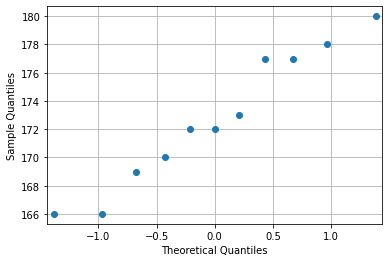

In [29]:
fig = sm.qqplot(weightlifters)
plt.grid()
plt.show()

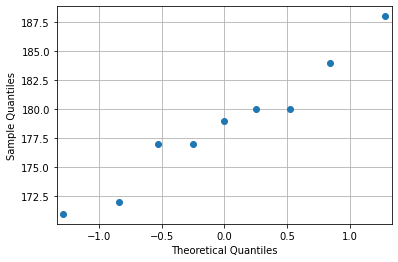

In [30]:
fig = sm.qqplot(hockey_players)
plt.grid()
plt.show()

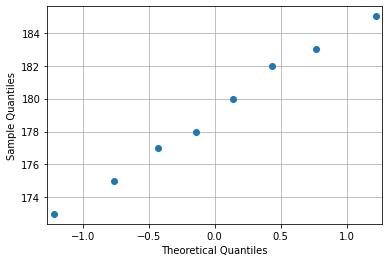

In [31]:
fig = sm.qqplot(footboll_players)
plt.grid()
plt.show()

Попробуем обогатить все наборы до 11 и выполнить тест Тьюки
Добавим футболистам 3 средний значения, а хоккеистам 2

In [53]:
footboll_players = np.append(footboll_players, np.repeat(footboll_players.mean(), repeats=3))

In [54]:
hockey_players = np.append(hockey_players, np.repeat(hockey_players.mean(), repeats=2))

In [55]:
df = pd.DataFrame({'score': list(np.hstack([footboll_players,hockey_players, weightlifters])), 
                   'group': np.repeat(['footboll_players', 'hockey_players', 'weightlifters'], repeats=11)})
df

,score,group
0,173.000000,footboll_players
1,175.000000,footboll_players
2,180.000000,footboll_players
3,178.000000,footboll_players
4,177.000000,footboll_players
5,185.000000,footboll_players
6,183.000000,footboll_players
7,182.000000,footboll_players
8,179.125000,footboll_players
9,179.125000,footboll_players


In [56]:
tukey = pairwise_tukeyhsd(endog = df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
footboll_players hockey_players  -0.4583 0.9675  -5.0687   4.152  False
footboll_players  weightlifters  -6.3977  0.005 -11.0081 -1.7874   True
  hockey_players  weightlifters  -5.9394 0.0094 -10.5497 -1.3291   True
-----------------------------------------------------------------------


По результату видим, что p-value для роста футболистов и хоккеистов выше значения критерия значимости, значит между их средними нет значимых различий (нулевая гипотеза)
Между футболистами и штангистами и хоккеистами и штангистами нулевая гипотеза отвергается и принимается гипотеза о том, что средние имеют статистические различия. То же мы увидели, когда проверяли попарно выше.


**Лекция**

**Однофакторный ДА**

В однофакторном дисперсионном анализе на одну количественную переменную Y влияет один фактор, наблюдаемый на k выборок для переменной Y

Нулевая гипотеза: $\mu_1 = \mu_2 = \mu_3$
Если различия будут найдены хотя бы между одной парой, то вывод, что профессия оказывает влияние на заработную плату.

Проблема множественных сравнений
При сравнении более 2х групп - критерий Фишера
2 - критерий Стьюдента

Если три пары сравнений, то истенный уровень статистической значимости $\alpha = 1 - (1-0.15)^{3} = 0.14$

Распределение Фишера:

$F_H = \frac{\sigma^2_{ф}}{\sigma^2_{ост}}$


post hoc tests

- Ньюмана_Кейлся
- Тесть Тьюки
- Поправка Бонферрони (устаревшаа, не использовать, когда более 8 сравнений)




Задача
Даны з/п юристов, программистов и бухгалтеров. Определить, влияет ли профессия на зп

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
y1 = np.array([70, 50, 65, 60, 75, 67, 74])
y2 = np.array([80, 74, 90, 70, 75, 65, 85])
y3 = np.array([148, 142, 140, 150, 160, 170, 155])

k = 3
n = 21

y_mean_1 = y1.mean()
y_mean_1

65.85714285714286

In [ ]:
y_mean_2 = y2.mean()
y_mean_2

77.0

In [ ]:
y_mean_3 = y3.mean()
y_mean_3

152.14285714285714

$$F_H = \frac{\sigma^2_{ф}}{\sigma^2_{ост}}$$

$$\sigma^2_{ф} = \frac{S^2_{ф}}{k-1}, k=3$$

$$\sigma^2_{ост} = \frac{S^2_{ост}}{n-k}, n=21$$

In [ ]:
total = np.array([y1, y2, y3])
total

array([[ 70,  50,  65,  60,  75,  67,  74],
       [ 80,  74,  90,  70,  75,  65,  85],
       [148, 142, 140, 150, 160, 170, 155]])

In [ ]:
total.mean()

98.33333333333333

$$S^2_{общ} = \Sigma (y_{ij} - Y_{mean-total}) \approx 32401$$

$$S^2_{ф} =  \sum^{k}_{i=1} (y_{mean, k} - Y_{mean-total})^2 * n_{i} \approx 30837$$

$$S^2_{ост} = \sum^{k}_{i=1} \sum^{n_i}_{j=1}(y_{ij}-y_{mean, i})^2 \approx 1564 $$

In [ ]:
# Сумма квадратов отклонений наблюдейний от общего среднего
S2obsh = np.sum((total - total.mean())**2)
S2obsh

32400.66666666667

In [ ]:
# Сумма квадратов отклонений средних групповых значений от общего среднего
S2ph = 0
for y_m1 in [y1.mean(), y2.mean(), y3.mean()]:
  S2ph += ((y_m1 - total.mean() ) ** 2) * len(y1)

S2ph

30836.952380952374

In [ ]:
y1

array([70, 50, 65, 60, 75, 67, 74])

In [ ]:
# Остаточная сумма квадратов отклонений
S2ost = 0
for y_m in list([y1, y2, y3]):
  for y_x in y_m:
    S2ost += (y_x - y_m.mean()) ** 2

S2ost

1563.7142857142858

In [ ]:
sigma2ph = S2ph / 2  # D_f
sigma2ph

15418.476190476187

In [ ]:
sigma2ost = S2ost / 18  # D_ost
sigma2ost

86.87301587301587

In [ ]:
F_n = sigma2ph / sigma2ost 
F_n

177.48291613374744

Из таблицы: Степерь свободы числителя (K1), степень свободы знаменателя для $\alpha = 0.05 $ равна 3.55

Так как значение расчётное меньше, чем критическое, то применяем альтернативную гипотезу, т.е. разница между выборками статистически значима для $\alpha = 0.05$

In [ ]:
f = stats.f_oneway(y1, y2, y3)
f

F_onewayResult(statistic=177.48291613374704, pvalue=1.420466900107174e-12)

Пост хок тест Тьюки

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import pandas as pd

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import pandas as pd

df = pd.DataFrame({'score': list(np.hstack([y1,y2, y3])), 
                   'group': np.repeat(['accountant', 'lawyer', 'programmer'], repeats=7)})
df

,score,group
0,70,accountant
1,50,accountant
2,65,accountant
3,60,accountant
4,75,accountant
5,67,accountant
6,74,accountant
7,80,lawyer
8,74,lawyer
9,90,lawyer


In [ ]:
tukey = pairwise_tukeyhsd(endog = df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
accountant     lawyer  11.1429 0.0918 -1.5722 23.8579  False
accountant programmer  86.2857    0.0 73.5707 99.0007   True
    lawyer programmer  75.1429    0.0 62.4278 87.8579   True
------------------------------------------------------------


**Двухфакторный ДА**

$$y_{ijk} = M + A_{i} + B_{j} + AB + E_{ijk}$$
$$y_{ijk} - M = A_{i} + B_{j} + AB + E_{ijk}$$
$$SS_{T} = SS_{A} + SS_{B} + SS_{AB} + SS_{E}$$

$$F_{н.А} -  F_{кр.А}$$
$$F_{н.B} F_{кр.B}$$
$$F_{н.АB} F_{кр.AB}$$

**Семинар** 

In [ ]:
pu_238 = np.array([0.126, 0.133, 0.127, 0.156, 0.503, 0.113, 0.129, 0.124, 1.022, 1.412, 1.533, 1.534, 1.437, 1.439, 1.375, 1.153, 0.201, 
          0.176, 0.239, 0.102, 1.070, 0.851, 0.125, 0.142, 0.352, 0.351, 0.346, 0.217, 1.068, 1.171, 1.213, 1.226, 1.111, 0.183, 
          0.162, 0.113, 1.30, 9, 1.638, 1.589, 1.411, 1.457, 0.397, 0.328, 0.242, 1.367])
pu_239 = np.array([75.804, 75.515, 75.175, 78.872, 73.317, 79.116, 75.751, 75.326, 63.287, 59.553, 58.688, 58.758, 59.728, 
          59.544, 59.877, 61.1, 82, 78.244, 78.166, 74.254, 79.840, 62.455, 73.189, 75.968, 75.957, 72.885,72.907, 
          72.919, 76.089, 70.129, 69.273, 69.147, 68.294, 71.076, 75.714, 76.150, 77.845, 62.382, 60.112, 60.519, 
          61.585, 61.332, 72.291, 73.451, 74.888, 60.507])
pu_240 = np.array([21.204, 21.408, 21.668, 18.428, 20.223, 18.548, 21.162, 21.557, 24.493, 25.576, 25.719, 25.692, 25.146, 25.126, 25.128, 
          25.100, 18.488, 18.629, 21.515, 17.872, 24.656, 18.285, 20.794, 20.867, 21.718, 21.721, 21.713, 20.225, 18.573, 18.633, 
          18.640, 18.869, 18.122, 20.750, 20.345, 19.108, 22.754, 23.320, 23.128, 23.133, 23.239, 21.761, 21.429, 20.939, 23.603])
pu_241 = np.array([2.180, 2.240, 2.305, 1.906, 4.128, 1.690, 2.260, 2.282, 6.990, 8.027, 8.279, 8.261, 8.377, 8.569, 8.428, 7.802, 2.351, 
          2.365, 2.901, 1.674, 7.512, 5.597, 2.407, 2.341, 3.618, 3.601, 3.600, 2.556, 7.689, 8.300, 8.363, 8.826, 7.248, 2.488, 
          2.524, 2.275, 9.311, 9.972, 9.970, 9.339, 9.321, 3.836, 3.419, 2.875, 9.839])

ShapiroResult(statistic=0.4726342558860779, pvalue=1.234524461823927e-11)

In [ ]:
stats.shapiro(pu_239)

ShapiroResult(statistic=0.8797206282615662, pvalue=0.0002011819597100839)

In [ ]:
stats.shapiro(pu_240)

ShapiroResult(statistic=0.9316781759262085, pvalue=0.010755813680589199)

In [ ]:
stats.shapiro(pu_241)

ShapiroResult(statistic=0.8336212635040283, pvalue=1.4246789760363754e-05)

In [ ]:
stats.kruskal(pu_238, pu_239, pu_240, pu_241)

KruskalResult(statistic=168.43409493963125, pvalue=2.771481039926156e-36)

2. 

In [ ]:
JJ_1=np.array([0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16 ])
JJ_2=np.array([1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42 ])
JJ_3=np.array([3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83])
JJ_4=np.array([6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61 ])

In [ ]:
stats.shapiro(JJ_1)

ShapiroResult(statistic=0.9837694764137268, pvalue=0.9688350558280945)

In [ ]:
stats.shapiro(JJ_2)

ShapiroResult(statistic=0.9252575635910034, pvalue=0.11057926714420319)

In [ ]:
stats.shapiro(JJ_3)

ShapiroResult(statistic=0.9523218274116516, pvalue=0.37654614448547363)

In [ ]:
stats.shapiro(JJ_4)

ShapiroResult(statistic=0.9590807557106018, pvalue=0.49780404567718506)

In [ ]:
stats.bartlett(JJ_1, JJ_2, JJ_3, JJ_4)

BartlettResult(statistic=109.62893110687119, pvalue=1.3188378332498392e-23)

In [ ]:
len(JJ_1)

21

In [ ]:
len(JJ_2)

21

In [ ]:
len(JJ_3)

21

In [ ]:
len(JJ_4)

21

In [ ]:
stats.f_oneway(JJ_1, JJ_2, JJ_3, JJ_4)

F_onewayResult(statistic=162.03157448390618, pvalue=6.81307443530621e-34)

In [ ]:
{'score': list(np.hstack([JJ_1, JJ_2, JJ_3, JJ_4])), 
                   'group': np.repeat(['JJ1', 'JJ2', 'JJ3', 'JJ4'], repeats=21)}

In [ ]:
np.hstack([JJ_1, JJ_2, JJ_3, JJ_4])

array([ 0.71,  0.63,  0.85,  0.44,  0.61,  0.69,  0.92,  0.55,  0.72,
        0.77,  0.92,  0.6 ,  0.83,  0.8 ,  1.  ,  0.77,  0.92,  1.  ,
        1.24,  1.  ,  1.16,  1.3 ,  1.45,  1.25,  1.26,  1.38,  1.86,
        1.56,  1.53,  1.59,  1.83,  1.86,  1.53,  2.07,  2.34,  2.25,
        2.16,  2.43,  2.7 ,  2.25,  2.79,  3.42,  3.69,  3.6 ,  3.6 ,
        4.32,  4.32,  4.05,  4.86,  5.04,  5.04,  4.41,  5.58,  5.85,
        6.57,  5.31,  6.03,  6.39,  6.93,  5.85,  6.93,  7.74,  7.83,
        6.12,  7.74,  8.91,  8.28,  6.84,  9.54, 10.26,  9.54,  8.73,
       11.88, 12.06, 12.15,  8.91, 14.04, 12.96, 14.85,  9.99, 16.2 ,
       14.67, 16.02, 11.61])

In [ ]:
df = pd.DataFrame({'score': list(np.hstack([JJ_1, JJ_2, JJ_3, JJ_4])), 
                   'group': np.repeat(['JJ1', 'JJ2', 'JJ3', 'JJ4'], repeats=21)})
df

,score,group
0,0.71,JJ1
1,0.63,JJ1
2,0.85,JJ1
3,0.44,JJ1
4,0.61,JJ1
...,...,...
79,9.99,JJ4
80,16.20,JJ4
81,14.67,JJ4
82,16.02,JJ4


In [ ]:
tukey = pairwise_tukeyhsd(endog = df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   JJ1    JJ2   1.1276 0.1282 -0.2087   2.464  False
   JJ1    JJ3     4.61    0.0  3.2737  5.9463   True
   JJ1    JJ4  10.1986    0.0  8.8622 11.5349   True
   JJ2    JJ3   3.4824    0.0   2.146  4.8187   True
   JJ2    JJ4    9.071    0.0  7.7346 10.4073   True
   JJ3    JJ4   5.5886    0.0  4.2522  6.9249   True
----------------------------------------------------


In [ ]:
stats.bartlett(JJ_1, JJ_2, JJ_3, JJ_4)

BartlettResult(statistic=18.576818199590036, pvalue=1.6319305004885752e-05)

In [ ]:
stats.f_oneway(JJ_1, JJ_2)

F_onewayResult(statistic=71.3215817007263, pvalue=1.9900379011154155e-10)

4.

In [ ]:
before = np.array([92.8 , 95.6, 92.1, 100.6, 96.2, 92.1, 96.7, 97.6, 97.0, 93.9])
after = np.array([87.1, 84.1, 81.3, 77.0, 86.0, 82.9, 83.0, 85.5, 85.2, 84.6]) 

In [ ]:
stats.ttest_rel(before, after, alternative='greater').pvalue + stats.ttest_rel(before, after, alternative='less').pvalue

1.0

In [ ]:
stats.ttest_rel(before, after, alternative='less')

TtestResult(statistic=7.972831441034037, pvalue=0.9999886277862766, df=9)

In [ ]:
stats.ttest_rel(before, after, alternative='two-sided')

TtestResult(statistic=7.972831441034037, pvalue=2.2744427446816035e-05, df=9)

In [ ]:
stats.ttest_rel(before, after)

TtestResult(statistic=7.972831441034037, pvalue=2.2744427446816035e-05, df=9)

5.


In [ ]:
Xm_1 = 75
Xm_2 = 69
n=100
delta = Xm_1 - Xm_2
print('delta', delta)

Z = 1.96 # Ф^(-1) (1-(0.05/2))

left_right = Z * s / (n ** 0.5)

D1 = np.var(X1, ddof=1)  # несмещённая дисперсия для выборки 1
print('D1', D1)
D2 = np.var(X2, ddof=1)  # то же для выборки 2
print('D2', D2)

D = 0.5*(D1 + D2)  # 
print('D', D)

Sd = np.sqrt(D/n1 + D/n2)  # стандартная ошибка разности средних
print('Sd', Sd)

df = 2 * (n1 - 1)  # объёмы выборок одинаковые 
print('df=', df)

t = stats.t.ppf(0.975, df)  # критерий Стьюдента
print('t=', t)

Low = delta - t*Sd  # нижняя граница
High = delta + t*Sd  # верхняя граница

print(f'95% доверительный интервал для разности роста родителей и детей: [{Low:.4f}; {High:.4f}]')

In [ ]:
9 / (99-9)

0.1